In [1]:
# Loan Prediction - Logistic Regression.ipynb


# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Datasets/train.csv")

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (614, 13)


In [4]:
print("\nColumns:", df.columns.tolist())


Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [5]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2   

In [7]:
# Step 3: Data Cleaning
# Drop Loan_ID (irrelevant)
df.drop("Loan_ID", axis=1, inplace=True)

In [8]:
# Handle missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [10]:
# Encode categorical variables

le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']:
    df[col] = le.fit_transform(df[col])


print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 Rows After Cleaning:\n", df.head())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB
None

First 5 Rows After Cleaning:
    Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           

In [11]:
# Step 4: Define Features and Target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [12]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (429, 11)
Testing Set Shape: (185, 11)


In [13]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [15]:
# Step 8: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8540540540540541
Precision: 0.8333333333333334
Recall: 0.984251968503937
F1 Score: 0.9025270758122743

Confusion Matrix:
 [[ 33  25]
 [  2 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.89      0.78      0.81       185
weighted avg       0.87      0.85      0.84       185



In [16]:
# Step 9: Interpret Coefficients
coefficients = pd.DataFrame({
'Feature': X.columns,
'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


print("\nFeature Influence on Loan Approval:\n", coefficients)


Feature Influence on Loan Approval:
               Feature  Coefficient
9      Credit_History     2.744891
1             Married     0.372076
2          Dependents     0.176196
5     ApplicantIncome    -0.000006
6   CoapplicantIncome    -0.000057
7          LoanAmount    -0.000884
8    Loan_Amount_Term    -0.003405
10      Property_Area    -0.049819
0              Gender    -0.147658
4       Self_Employed    -0.196864
3           Education    -0.726835


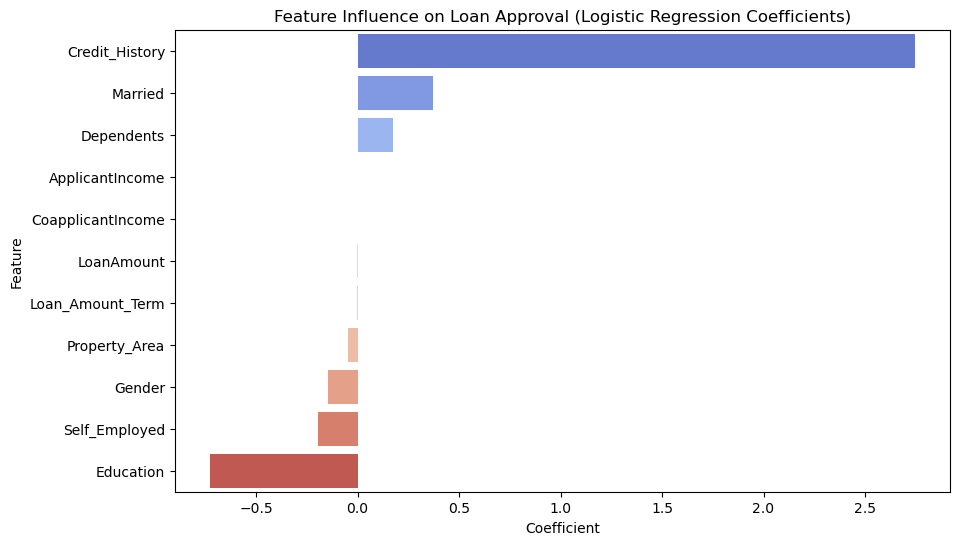

In [17]:
# Visualization: Feature Influence
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title("Feature Influence on Loan Approval (Logistic Regression Coefficients)")
plt.show()

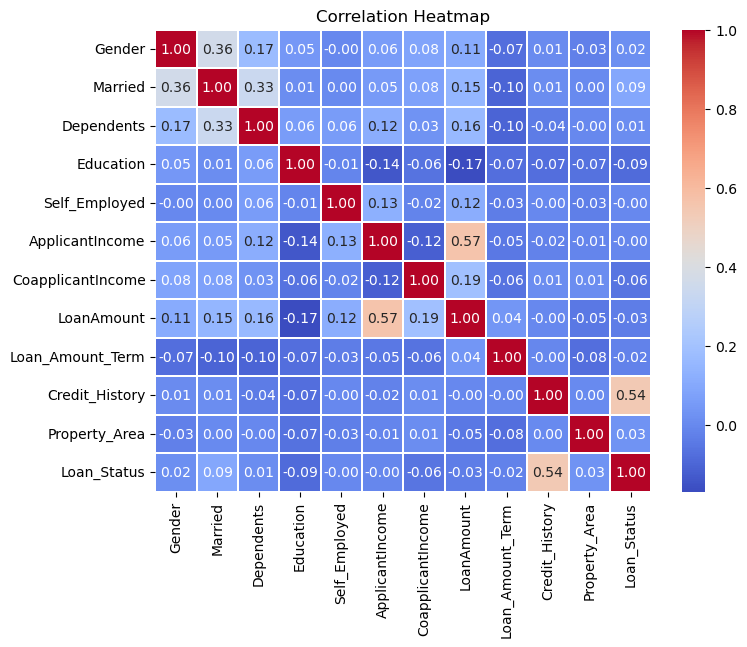

In [18]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.01)
plt.title("Correlation Heatmap")
plt.show()

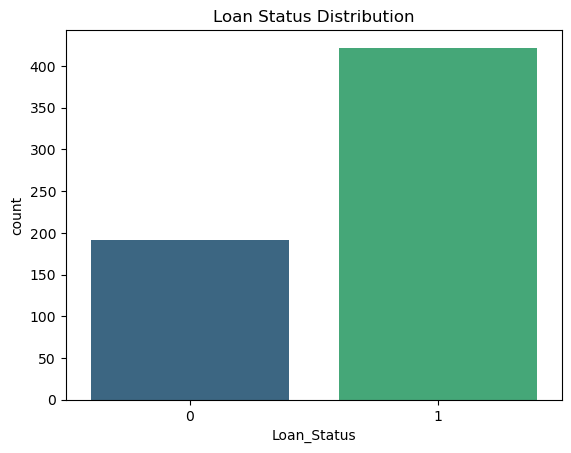

In [19]:
# Visualization: Loan Status Distribution
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title("Loan Status Distribution")
plt.show()

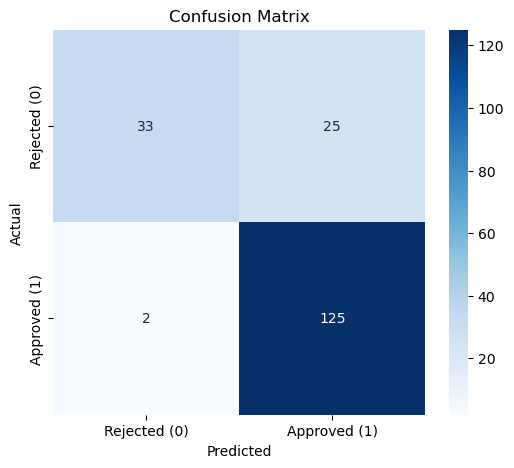

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
